In [29]:
import pandas as pd
from collections import Counter
import numpy as np
import os

In [93]:
RESULTS_FOLDERS = ['NO_LATENCY_RESULTS', '05MS_LATENCY_RESULTS', '5MS_LATENCY_RESULTS', '25MS_LATENCY_RESULTS',
                   '50MS_LATENCY_RESULTS', '100MS_LATENCY_RESULTS', '200MS_LATENCY_RESULTS']

RESULTS_FOLDER = RESULTS_FOLDERS[5]

In [95]:
FILES = []
for file in os.listdir(RESULTS_FOLDER):
    print(file)
    FILES.append(file)

mnist250_6c_640s_1566817054.csv
mnist250_2c_640s_1566816886.csv
mnist250_9c_640s_1566817342.csv
mnist250_10c_640s_1566817533.csv
mnist250_3c_640s_1566816918.csv
mnist250_7c_640s_1566817124.csv
mnist250_5c_640s_1566817001.csv
mnist250_4c_640s_1566816954.csv
mnist250_8c_640s_1566817205.csv


In [96]:
LABELED_RESULTS = []
UNLABELED_RESULTS = []

for f in FILES:
    
    print(f)
    df = pd.read_csv(os.path.join(RESULTS_FOLDER, f))
    
    # Percentage of unlabeled samples
    #unlabeled_ratio = df.groupby('Label')['Sample ID'].nunique()[-1] / len(df)
    #print(unlabeled_ratio)
    
    # Mean time elapsed per unlabeled data samples
    unlabeled_mean = df.groupby('Label')['Time elapsed'].mean()[-1]
    UNLABELED_RESULTS.append(unlabeled_mean)
    print(unlabeled_mean)
    
    # Mean time elapsed per labeled data samples
    labeled_mean = np.mean( list( set(list(df.groupby('Label')['Time elapsed'].mean())) - set([unlabeled_mean]) ) )
    LABELED_RESULTS.append(labeled_mean)
    print(labeled_mean)
    
    print('------------------')

mnist250_6c_640s_1566817054.csv
0.07389084315690837
0.15326809314445022
------------------
mnist250_2c_640s_1566816886.csv
0.030311661630772466
0.07383622733297401
------------------
mnist250_9c_640s_1566817342.csv
0.2067696493725444
0.41940408105671767
------------------
mnist250_10c_640s_1566817533.csv
0.3331594831624608
0.6700964192507937
------------------
mnist250_3c_640s_1566816918.csv
0.03554643326551207
0.07934330949364732
------------------
mnist250_7c_640s_1566817124.csv
0.08828370190836901
0.18636845057313908
------------------
mnist250_5c_640s_1566817001.csv
0.05591775763849294
0.11936645195820726
------------------
mnist250_4c_640s_1566816954.csv
0.047409827604233845
0.10529309540323636
------------------
mnist250_8c_640s_1566817205.csv
0.14716924587113958
0.3044701933939372
------------------


In [97]:
LABELED_RESULTS = sorted(LABELED_RESULTS)
UNLABELED_RESULTS = sorted(UNLABELED_RESULTS)

print(LABELED_RESULTS)

[0.07383622733297401, 0.07934330949364732, 0.10529309540323636, 0.11936645195820726, 0.15326809314445022, 0.18636845057313908, 0.3044701933939372, 0.41940408105671767, 0.6700964192507937]


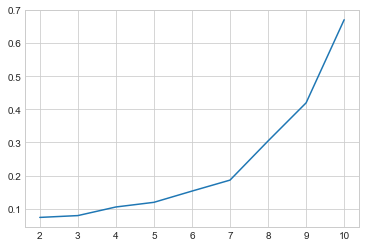

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = list(range(2,11))

ax.plot(x, LABELED_RESULTS)

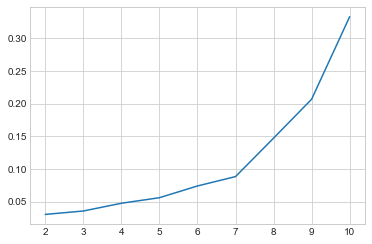

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = list(range(2,11))

ax.plot(x, UNLABELED_RESULTS)

In [ ]:
# Summary results (labeled)
L_0 = [0.05327391600536251, 0.059776248113604345, 0.07498836058613395, 0.08419884912993764, 0.11281462267327294, 0.13278451682741332, 0.2812577139204032, 0.3838051672609066, 0.630861246247114]
L_05 = [0.053072257682212284, 0.05969336642195801, 0.07673287397034129, 0.08512619745859955, 0.11034926997638576, 0.13365216904205965, 0.2795443728710032, 0.3902468926886838, 0.6268709020802055]
L_5 = [0.0570171077159205, 0.06477492126112698, 0.0841076974822905, 0.09307648862295909, 0.12038963258736207, 0.14252806186869194, 0.2979964917805073, 0.4123542950377921, 0.6384503467354801]
L_25 = [0.058525652164735646, 0.06639834546064224, 0.08644665474359309, 0.09706586084840335, 0.12658107143442268, 0.15407243112402796, 0.3093516469046962, 0.4074708614155767, 0.655767792010913]
L_50 = [0.0665749642329355, 0.07105604282067272, 0.09184184824639509, 0.10148602595412491, 0.13428193557085583, 0.1653775772702327, 0.3004383901620941, 0.42101882778928706, 0.6456530300883414]
L_100 = [0.07383622733297401, 0.07934330949364732, 0.10529309540323636, 0.11936645195820726, 0.15326809314445022, 0.18636845057313908, 0.3044701933939372, 0.41940408105671767, 0.6700964192507937]
L_200 = []